In [1]:
import numpy as np
import json
import random
from scipy import spatial
import pandas as pd

In [2]:
data = np.load("./feature_mat.npy")

In [3]:
data = data.transpose()

In [4]:
data.shape

(2625, 100)

In [5]:
with open("./scores.json") as j:
    data_json = json.load(j)

In [6]:
def getScore(i, j, score_matrix, feature_matrix):
    return score_matrix[i]*score_matrix[j]*(1 - spatial.distance.cosine(feature_matrix[i], feature_matrix[j]))
def getResult(score_matrix, feature_matrix):
    result=[]
    myset = set([])
    current_shape = 1
    cur_max = -1
    cur_index = -1
    movie_size = len(score_matrix)
    for i in range(0, movie_size):
        score = np.linalg.det(np.array(getScore(i,i,score_matrix, feature_matrix)).reshape(1,1))
        if score > cur_max:
            cur_max = score
            cur_index = i
    L = np.array(getScore(cur_index,cur_index,score_matrix, feature_matrix)).reshape(1,1)
    result.append(cur_index)
    myset.add(cur_index)
    old_score = 0
    for i in range(1, movie_size):
        #save L for roll back
        old_L = L
        #Make L bigger
        new_shape = current_shape + 1
        vertical = np.zeros([1, current_shape])
        horizontal = np.zeros([new_shape, 1])
        L = np.concatenate((L, vertical), axis=0)
        L = np.concatenate((L, horizontal), axis=1)
        #print(L.shape)
        #Try to add new id
        cur_max = -1
        cur_index = -1
        for j in range(0, movie_size):
            if j not in myset:
                #computer new row and column
                for position in range(0, current_shape):
                    p_score = getScore(result[position], j, score_matrix, feature_matrix)
                    #column
                    L[position, current_shape] = p_score
                    #row
                    L[current_shape, position] = p_score
                L[current_shape, current_shape] = getScore(j, j, score_matrix, feature_matrix)
                score = np.linalg.det(L)
                if score > cur_max:
                    cur_max = score
                    cur_index = j
        for position in range(0, current_shape):
            p_score = getScore(result[position], cur_index, score_matrix, feature_matrix)
            L[position,current_shape] = p_score
            L[current_shape,position] = p_score
        L[current_shape, current_shape] = getScore(cur_index, cur_index,score_matrix, feature_matrix)
        #result.append(cur_index)
        #myset.add(cur_index)
        #print(L)
        current_shape+=1
        if cur_max >= old_score:
            old_score = cur_max
            result.append(cur_index)
            myset.add(cur_index)
            #print(L)
        else:
            break
    for i in range(0, movie_size):
        if i not in myset:
            result.append(i)
        else:
            continue
    return result

In [7]:
userlike = {}
userlike_no = {}
def generate_wanted(data_json, data, topK):
    for userId, movieScore in data_json.items():
        topMovie = movieScore[:topK]
        topScore = [i[1] for i in topMovie]
        movie_ids = [i[0] for i in topMovie]
        movie_feature = [ data[i] for i in movie_ids]
        result = getResult(topScore, movie_feature)
        th = set(result)
        assert len(th) > 1,"nothing"
        userlike_no[userId] = movie_ids
        reorder_id = [movie_ids[i] for i in result]
        userlike[userId] = reorder_id

In [8]:
generate_wanted(data_json, data, 10)

In [9]:
movie_info = pd.read_csv("./u.item", sep="|",header=None, index_col=None)

In [10]:
movie_cate = {}
def decode_onehot(movie_data):
    for i in range(len(movie_data)):
        movie_cate[i] = []
        for j in range(5, 24, 1):
            if movie_data.loc[i, j] == 1:
                movie_cate[i].append(j - 5)
decode_onehot(movie_info)

In [11]:
user_like_cate = {}
user_like_noorder = {}

for key, value in userlike.items():
    for movie in value[:3]:
        for cate in movie_cate[movie]:
            user_like_cate[cate] = user_like_cate.get(cate, 0) + 1

for key, value in userlike_no.items():
    for movie in value[:3]:
        for cate in movie_cate[movie]:
            user_like_noorder[cate] = user_like_cate.get(cate, 0) + 1

In [12]:
user_like_cate = sorted(user_like_cate.items(), key=lambda x: x[0])
user_like_cate_noorder = sorted(user_like_noorder.items(), key=lambda x: x[0])

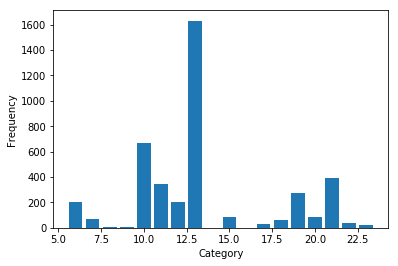

In [37]:
import matplotlib.pyplot as plt

x = [i[0] for i in user_like_cate]
y = [i[1] for i in user_like_cate]

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Category')
plt.ylabel('Frequency')
# for i in range(len(y)):
#     plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()

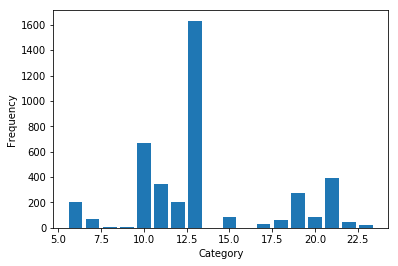

In [38]:
import matplotlib.pyplot as plt

x = [i[0] for i in user_like_cate_noorder]
y = [i[1] for i in user_like_cate_noorder]

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Category')
plt.ylabel('Frequency')
# for i in range(len(y)):
#     plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()

In [13]:
userlike_no.keys()

dict_keys(['1682', '1683', '1684', '1685', '1686', '1687', '1688', '1689', '1690', '1691', '1692', '1693', '1694', '1695', '1696', '1697', '1698', '1699', '1700', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1713', '1714', '1715', '1716', '1717', '1718', '1719', '1720', '1721', '1722', '1723', '1724', '1725', '1726', '1727', '1728', '1729', '1730', '1731', '1732', '1733', '1734', '1735', '1736', '1737', '1738', '1739', '1740', '1741', '1742', '1743', '1744', '1745', '1746', '1747', '1748', '1749', '1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781', '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805

In [28]:
t = '1682'
th = userlike_no[t]
th1 = userlike[t]

In [29]:
for i in th:
    print(movie_info.loc[i, 1])
    print(movie_cate[i])

print('fuck\n\n\n')
for j in th1:
    print(movie_info.loc[j, 1])
    print(movie_cate[j])

Sabrina (1954)
[5, 14]
They Made Me a Criminal (1939)
[6, 8]
Witness (1985)
[8, 14, 16]
Much Ado About Nothing (1993)
[5, 14]
Star Wars (1977)
[1, 2, 14, 15, 17]
Some Folks Call It a Sling Blade (1993)
[8, 16]
Kolya (1996)
[5]
Raging Bull (1980)
[8]
Wonderful, Horrible Life of Leni Riefenstahl, The (1993)
[7]
Entertaining Angels: The Dorothy Day Story (1996)
[8]
fuck



Sabrina (1954)
[5, 14]
Witness (1985)
[8, 14, 16]
They Made Me a Criminal (1939)
[6, 8]
Much Ado About Nothing (1993)
[5, 14]
Star Wars (1977)
[1, 2, 14, 15, 17]
Some Folks Call It a Sling Blade (1993)
[8, 16]
Kolya (1996)
[5]
Raging Bull (1980)
[8]
Wonderful, Horrible Life of Leni Riefenstahl, The (1993)
[7]
Entertaining Angels: The Dorothy Day Story (1996)
[8]
